# Evolution strategies

An ES is an optimization technique based on truncation selection and usually only uses mutation.


## $\left( \mu, \lambda\right)$ algorithm

Initially, we have a population with $\lambda$ individuals and we asses their fitness. We perform selection using Truncation selection, it consists in deleting from the population all but the $\mu$ fittest individuals. Each of the fittest individuals generates $\frac{\lambda}{\mu}$ through mutation. The children just replace the parents, who are discarded.

## $\left(\mu +\lambda  \right)$ algorithm

As before, we have a population with $\lambda$ individuals and we asses their fitness. We perform selection using Truncation selection obtaining $\mu$ individuals and then we generate $\mu$ children using mutation. At this point, the new generation consists in the $\lambda$ parents plus the $\mu$ children.

## Mutation

A mutation operator should enjoy the following properties:
- reachability, each area of the search space can be reached in a finie number of steps;
- unbiasedness, mutation should not use any information deriving from the fitness of the individual;
- scalability, the "strength" of the mutation should be adaptable to the specific search space.

In the case of real values, the mutation is usually performed by adding a Gaussian noise to the coordinates.

$$
    x_{i}^{new} = x_i + \varepsilon
$$

where $\varepsilon \sim N \left( \mu, \sigma^2 \right)$ .

## Self-adaptivity

Self-adaptive ES are carachterized by a series of parameters that can be modified during the evolution. An individual che be represented as
$$
    (x, \theta)
$$

where $\theta$ is the set of parameters of the operators used for mutation.

An example of parameter of the mutation is the variance $\sigma^2$ of the Gaussian noise and an example of self-adaptation is the one-fith rule. This is an empirical rule:
- if less than 20% of the children are fitter than their parents then decrease the variance ($\sigma = \sigma / c $)
- otherwise, increase the variance ($\sigma = c\ \sigma $)

where $0.817 < c < 1$.

## ES with recombination

In $\left(\mu, \lambda \right)$ and $\left(\mu + \lambda \right)$ algorithms, it is possible to add a recombination step using $\rho$ parents. It means that to generate each of the $\lambda$ children, $\rho$ individual are randomly selected without reinsertion from the population of size $\mu$. 

The notation is $\left(\mu/\rho, \lambda \right)$ and $\left(\mu/\rho + \lambda \right)$.

### Discrete recombination
For each position select randomly from one of the $\rho$ individuals.

### Intermediate recombination
Given the values
$$
    x_1^j,x_2^j,\dots,x_{\rho}^j
$$
for each position j of the parents, the offspring will contain the average
$$
    \frac{1}{\rho}\sum_{i=1}^{\rho}x_i^j
$$


 # Problem


Maximize the function defined as $$f(x,y) = -(y+47)\sin\left(\sqrt{\left|\frac{x}{2} + y + 47\right|}\right) - x\sin(\sqrt{|x-(y+47|})$$ in the interval $[-512,+512]$. It has a global optimum in $(512, 404.2319)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

In [2]:
def eggholder(point):
    '''
        Eggholder function
    '''
    x, y = point
    res = -(y + 47)*np.sin(np.sqrt(np.abs(x/2 + y + 47))) - x*np.sin(np.sqrt(np.abs(x-(y+47))))
    return res

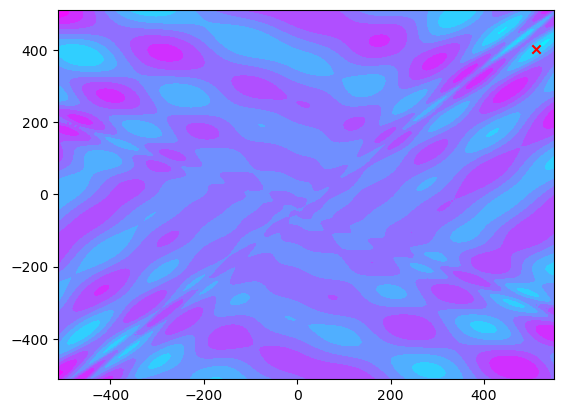

In [3]:
# Plot for Eggholder function
fig, ax = plt.subplots()
plt.set_cmap('cool')
x = np.linspace(-512, 550, 200)
y = np.linspace(-512, 512, 200)
X_EH, Y_EH = np.meshgrid(x, y)
EH = eggholder([X_EH, Y_EH])
ax.contourf(X_EH, Y_EH, EH)
ax.scatter([512], [404.2319], marker='x', color='red')

In [4]:
class EvolutionStrategy():
    def __init__(self, fitness, mu = 3, la = 10, plus = False, sigma = 1, limits = [(-10,10), (-10,10)]):
        self.fitness = fitness
        self.mu = mu
        self.la = la
        self.plus = plus
        self.sigma = sigma
        self.limits = limits
        self.population = []
        self.n_generation = 0
    
    def init_population(self):
        '''
            Method to initialize the population
        '''
        for i in range(self.la):
            individual = []
            for limit in self.limits:
                individual.append(np.random.uniform(limit[0], limit[1]))
            self.population.append(individual)

    def truncated_selection(self):
        '''
            Method to select the best mu individuals
        '''
        self.population.sort(key = lambda individual: self.fitness(individual), reverse = False)
        selected = self.population[:self.mu]
        return selected

    def mutation(self, individual):
        '''
            Method to mutate an individual
        '''
        return individual + np.random.normal(0, self.sigma, len(individual))
    
    def next_generation(self):
        '''
            Method to generate the next generation
        '''
        selected = self.truncated_selection() #truncated selection
        children = [] #children
        if self.plus: # (mu + la) algorithm
            children = [self.mutation(individual) for individual in selected]
            children.extend(self.population)
            self.population = children
        else: # (mu, la) algorithm
            children = [self.mutation(selected[i % self.mu]) for i in range(self.la)]
            self.population = children
    
    
    def print_population(self):
        '''
            Method to print the population using matplotlib
        '''
        fig, ax = plt.subplots()
        plt.set_cmap('cool')
        x = np.linspace(self.limits[0][0], self.limits[0][1], 200)
        y = np.linspace(self.limits[1][0], self.limits[1][1], 200)
        X_EH, Y_EH = np.meshgrid(x, y)
        EH = self.fitness([X_EH, Y_EH])
        ax.contourf(X_EH, Y_EH, EH)
        for individual in self.population:
            ax.scatter(individual[0], individual[1], marker='o', color='black')
        plt.title(f"Generation {self.n_generation}")
        plt.show()


    def run(self, max_iter = 5):
        '''
            Method to run the algorithm
        '''
        self.init_population()
    
        for iter in range(max_iter):
            self.n_generation = iter
            self.print_population()
            time.sleep(1)
            self.next_generation()

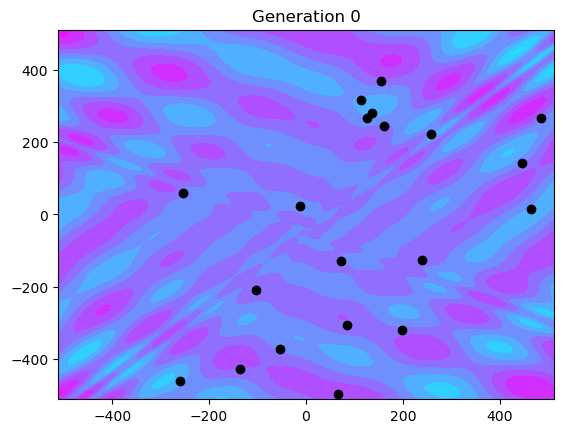

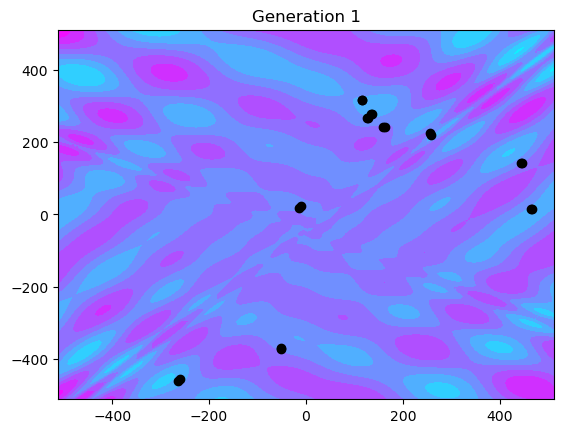

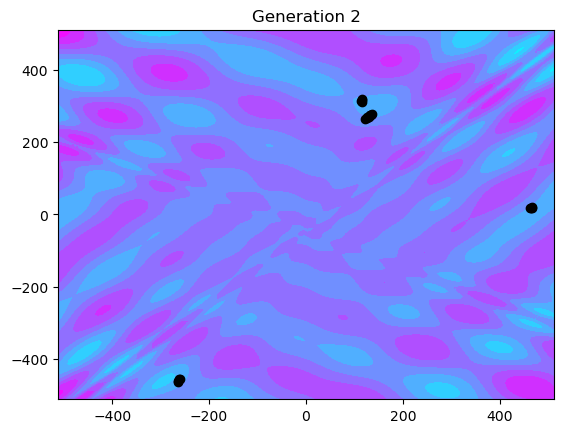

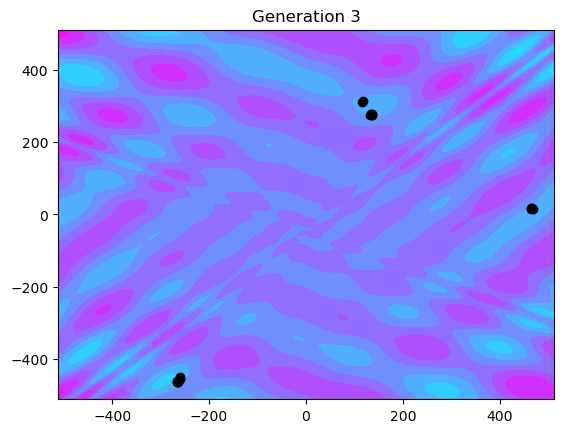

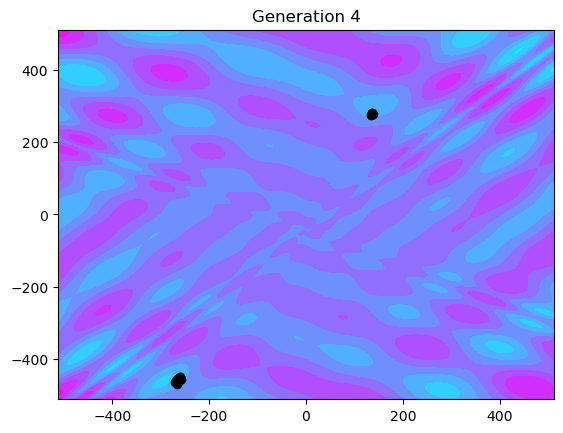

In [6]:
ES = EvolutionStrategy(eggholder, mu = 10, la = 20, plus = False, sigma = 2, limits = [(-512,512), (-512,512)])
ES.run()